<a href="https://colab.research.google.com/github/iotpelican/ml-llm-course-work/blob/main/ss_T27_hw_03_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 03 - Linear Regression and Gradient Descent

### <span style="color:maroon"> Assignment Submission Instructions </span>

Please note that your homework won’t be graded if your notebook doesn’t include the output. Before submitting to Gradescope, make sure to run all the cells so that the output is visible. If you're using Google Colab: Go to Edit > Notebook settings and uncheck the box that says “Omit code cell output when saving,” otherwise your output won’t be saved.Points may also be taken off if these guidelines aren’t followed.
    
Make sure to comment your code so others can easily understand what it does. Each graph should include a title, axis labels, and a legend if necessary. The goal is for each graph to be clear and understandable on its own. Try to avoid using the global namespace too much—it's best to keep your code organized inside functions whenever possible. When you're done, upload your .ipynb file to Canvas.

This assignment introduces you to linear regression using both scikit-learn and a manual implementation of gradient descent. You will explore a real-world dataset (California Housing Dataset). You will build an initial linear regression model using scikit-learn and implement gradient descent step-by-step. You will then compare learning behavior with different hyperparameters and interpret and evaluate model performance


Submit .ipynb file with all code and outputs.

Comment your code where asked.

Answer all questions clearly in markdown cells.

## Part 0: Load and Explore Dataset (20 points)
The code provided below performs a list of operations such as loading the dataset, extracting MedInc as feature and MedHouseVal as target, splitting into train/test sets and displaying first 5 rows along with the data shape. Run the cell once to check it is displaying the appropriate ifnormation

In [10]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load dataset
california = fetch_california_housing(as_frame=True)
df = california.frame

# Select feature and target
data = df[['MedInc', 'MedHouseVal']]

# Display first 5 rows and shape
print(data.head())
print(data.shape)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X = data[['MedInc']]
y = data['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Display shapes of train/test splits
#print("Train shape:", X_train.shape, y_train.shape)
#print("Test shape:", X_test.shape, y_test.shape)


   MedInc  MedHouseVal
0  8.3252        4.526
1  8.3014        3.585
2  7.2574        3.521
3  5.6431        3.413
4  3.8462        3.422
(20640, 2)



Questions-

1. What relationship do you expect between Median Income and Median House Value?

**Answer 0-1**:
We can expect a strong positive correlation between Median Income and Median House Value.

2. Why might Median Income be a good predictor for house prices?

**Answer 0-2**:
The neighborhoods with higher median incomes tend to have higher median house values, as higher income residents tend to afford more expensive housing, driving up demand and prices.

---
### Part 1: Linear Regression with Scikit-learn (20 points)

Task:

1. Fit LinearRegression model on training data

2. Print learned intercept and coefficient

3. Plot training data and regression line

Intercept: 0.4445972916907879
Coefficient: 0.4193384939381271


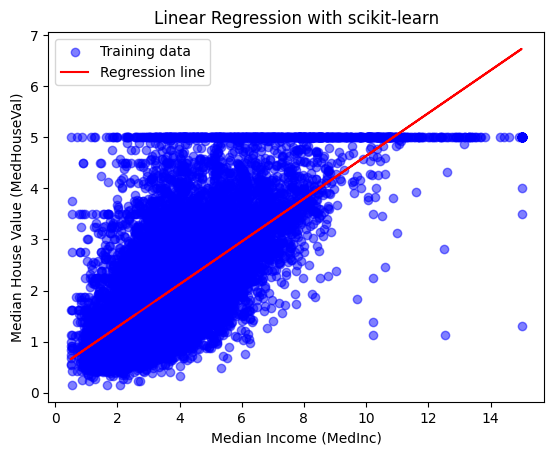

In [11]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

reg = LinearRegression()
reg.fit(X_train, y_train)

print(f"Intercept: {reg.intercept_}")
print(f"Coefficient: {reg.coef_[0]}")

plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training data')
plt.plot(X_train, reg.predict(X_train), color='red', label='Regression line')
plt.xlabel("Median Income (MedInc)")
plt.ylabel("Median House Value (MedHouseVal)")
plt.title("Linear Regression with scikit-learn")
plt.legend()
plt.show()



Questions-


1. What does the slope (coefficient) tell you about the relationship between Median Income and House Value?

**Answer 1-1:**

The slope of the line is positive (0.4193384939381271), means that as Median Income increases, the Median House Value is predicted to increase proportionally.



2. What does the intercept represent in this context?
**Answer 1-2:**

The intercept (y-intercept = 0.4445972916907879) in this linear regression model, computed by reg.intercept, indicates the predicted Median House Value when the Median Income (MedInc) is zero.
Conceptually, it gives baseline or starting point for the house value, from which the median income then adds (or subtracts) its influence. For every 10,000 dollar increase in median income, the median house value is predicted to increase by approximately $44459.


---
### Part 2: Feature Scaling and Gradient Descent Implementation (20)

Task:

1. Scale features and target with StandardScaler

2. Implement gradient descent on scaled data for 1000 iterations, learning rate 0.01

3. Print loss every 100 iterations

In [12]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd

# Load dataset
california = fetch_california_housing(as_frame=True)
df = california.frame

# Select feature and target
data = df[['MedInc', 'MedHouseVal']]

# Split data into training and testing sets
X = data[['MedInc']]
y = data['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Scale features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1)).flatten()

X_train_np = X_train_scaled.flatten()
y_train_np = y_train_scaled
n = len(X_train_np)

w = 0.0
b = 0.0
lr = 0.01
num_iterations = 1000
losses = []

for i in range(num_iterations):
    y_pred = w * X_train_np + b
    error = y_pred - y_train_np

    loss = np.mean(error ** 2)
    losses.append(loss)

    # Calculate gradients (dw, db)
    # YOUR CODE HERE
    dw = (2/n) * np.sum(error * X_train_np)
    db = (2/n) * np.sum(error)

    # Update weights
    # YOUR CODE HERE
    w = w - lr * dw
    b = b - lr * db

    if i % 100 == 0:
        print(f"Iteration {i}, Loss: {loss:.6f}")

Iteration 0, Loss: 1.000000
Iteration 100, Loss: 0.531397
Iteration 200, Loss: 0.523155
Iteration 300, Loss: 0.523010
Iteration 400, Loss: 0.523007
Iteration 500, Loss: 0.523007
Iteration 600, Loss: 0.523007
Iteration 700, Loss: 0.523007
Iteration 800, Loss: 0.523007
Iteration 900, Loss: 0.523007


**Professor: I am seeking clarification,**

when I tried to understand on internet, I found some contradictory approaches for calculating gradients:

    dw = (2/n) * np.sum(error * X_train_np)
    db = (2/n) * np.sum(error)

               OR

    dw = (1/n) * sum(error * X_train_np)
    db = (1/n) * sum(error)


Upon research: I found the found the following explaination, is it correct:

*Why the factor of 2 is often omitted in code*:

* *You'll notice that the derived gradients have a factor of 2/N. However, in many practical gradient descent implementations, especially when the learning rate lr is a hyperparameter you tune, the factor of 2 is often omitted from the gradient calculation (effectively using 1/N as the scaling factor). This is because the learning rate lr can absorb this constant factor, and the direction of the gradient (which is what matters for moving towards the minimum) remains the same.*

* Therefore, the formulas dw = (1/n) * sum(error * X_train_np) and db = (1/n) * sum(error) are the commonly used and effective forms for implementing batch gradient descent for simple linear regression with MSE loss.


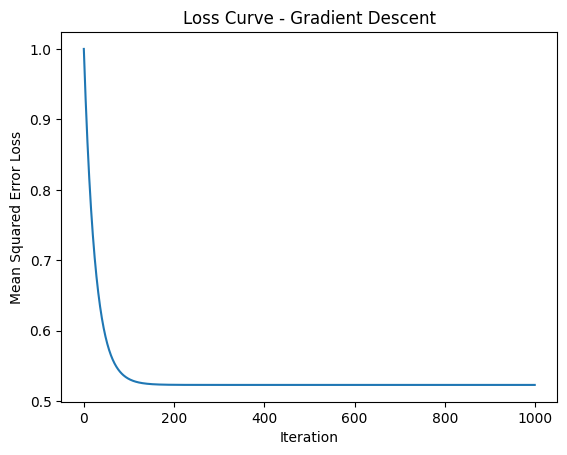

In [13]:
#Plot Loss Curve
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error Loss")
plt.title("Loss Curve - Gradient Descent")
plt.show()


Questions-
**Question 2-1**
1. Does the loss decrease consistently during gradient descent training?

**Answer 2-1:**
Yes, in this dataset's linear regression the loss is decrease consistently during training.

* The relationship between MedInc and MedHouseVal in the California Housing dataset has a strong linear component. This helps gradient descent converge more smoothly.

* The decrease is rapid at first and then slows down as the model approaches the minimum of the loss function.



**Question 2-2**. What might happen if the learning rate was too high or too low?

**Answer 2-2:**

* **1. If the Learning Rate is Too High:**
The steps taken in the direction of the minimum are too large.

Consequences:
The loss might not decrease; instead, it could increase with each iteration. thus causing divergence or oscillation thus fail to converge.

The loss curve would look erratic, possibly spiking upwards or showing large, inconsistent fluctuations.

* **2. If the Learning Rate is Too Low:**
The steps taken towards the minimum are very small.

Consequences:
The training can take long time to converge to the minimum, needing very large number of iterations to see progress. A very low learning rate can cause the optimizer to get stuck in a suboptimal local minimum, failing to reach the global minimum, resulting in an underfit model.

The loss curve would show a very gradual, almost flat decrease, indicating that progress has stalled.








**Question 2-3**.. Why is feature scaling important for gradient descent to work effectively here?

**Answer 2-3:**

Feature scaling is necessary for Gradient Descent to work effectively, when we have multiple features.  Some key reasons:

* **Uniform Learning Rate Application**: Gradient Descent updates model parameters (weights/coefficients) by taking steps proportional to the gradient of the loss function.

* **Faster and More Stable Convergence**:In case of loss function's surface is a bowl, if features are unscaled, this bowl will be very elongated or "elliptical." Gradient Descent will then take a zig-zag path, bouncing back and forth across the narrow dimensions, making very slow progress towards the minimum. This avoids oscillations and overshooting.

* **Prevents Dominance by Large-Valued Features**: Without scaling, features with inherently larger numerical ranges might numerically dominate the objective function, even if they are not inherently more important. The model might incorrectly prioritize optimizing for these features simply because their values are larger, leading to suboptimal learning.


Feature scaling ensures all features contribute fairly to the gradient updates.

---
### Part 3: Experimenting with Learning Rates (20)

Task:

1. Repeat gradient descent with learning rates 0.0001, 0.01, and 0.5

2. Plot loss curves on same graph

3. Observe and describe convergence behavior

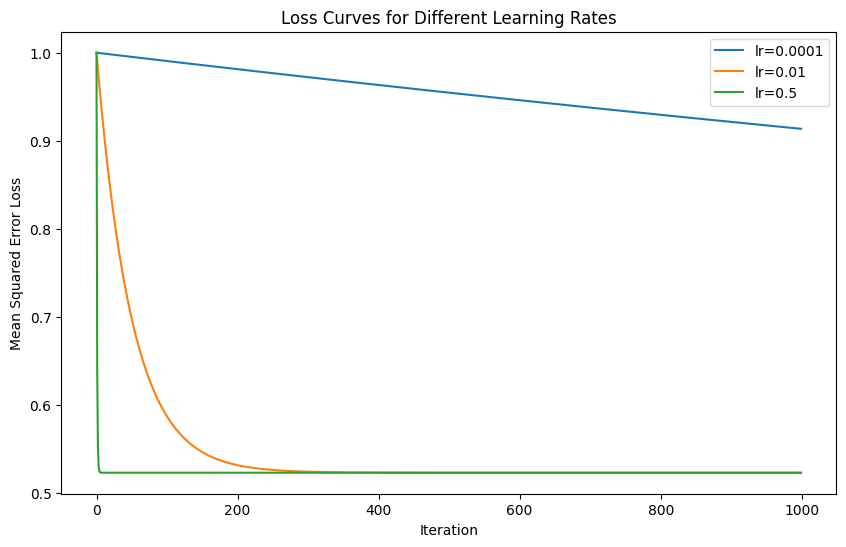

In [14]:
learning_rates = [0.0001, 0.01, 0.5]
loss_curves = {}

for lr in learning_rates:
    w_temp, b_temp = 0.0, 0.0
    losses_temp = []

    for i in range(num_iterations):
        y_pred_temp = w_temp * X_train_np + b_temp
        error_temp = y_pred_temp - y_train_np

        loss_temp = np.mean(error_temp ** 2)
        losses_temp.append(loss_temp)

        # YOUR CODE HERE
        # Calculate Gradients (dw_temp, db_temp)
        # These are the partial derivatives of the MSE loss function with respect to w and b.
        dw_temp = (1/n) * sum(error_temp * X_train_np)
        db_temp = (1/n) * sum(error_temp)

        # YOUR CODE HERE
        # Update Weights (w_temp, b_temp)
        # Update the weights in the direction opposite to the gradient, scaled by the learning rate.
        w_temp = w_temp - lr * dw_temp
        b_temp = b_temp - lr * db_temp

    loss_curves[lr] = losses_temp

plt.figure(figsize=(10,6))
for lr in learning_rates:
    plt.plot(loss_curves[lr], label=f"lr={lr}")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error Loss")
plt.title("Loss Curves for Different Learning Rates")
plt.legend()
plt.show()



Questions-

**Question 3-1**
1. Which learning rate showed the best convergence behavior?

**Answer 3-1:**
The learning_rate of 0.01 (Orange color) shows the best convergence, gradual, reasonably fast iteration and consistent decrease to a minimum.



**Question 3-2**
2. Did any of the runs diverge or converge too slowly? Why?
**Answer 3-2:**
Very low learning_rate of 0.0001 (blue color) converged too slowly.

Higher learning_rate of 0.5 (green color) steep fall in loss, does not seem to converge.



**Question 3-3**
3. What happens if the learning rate is too large or too small in gradient descent?
**Answer 3-3:**

If the learning rate in gradient descent is:

**Too High**: The optimizer takes steps that are too large, causing it to overshoot the minimum of the loss function. This can lead to the loss diverging (increasing rapidly) or oscillating wildly without converging to a stable solution.


**Too small**: The optimizer takes very small steps, making the convergence process extremely slow. It might take large number of iterations to reach the minimum, or it could get stuck in a suboptimal local minimum (in non-convex problems) before reaching the global optimum.

---
### Part 4: Evaluating Gradient Descent (20)

Task:

1. Predict on scaled test data using final w, b from Part 2

2. Inverse-transform predictions to original scale

3. Calculate and print MAE, MSE, RMSE

4. Compare with scikit-learn model predictions on original test data

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict on scaled test data
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1,1)).flatten()

y_pred_scaled = w * X_test_scaled.flatten() + b

# Inverse transform predictions
y_pred_gd = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1)).flatten()

mae = mean_absolute_error(y_test, y_pred_gd)
mse = mean_squared_error(y_test, y_pred_gd)
rmse = np.sqrt(mse)

print(f"Gradient Descent Model:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

# scikit-learn predictions
y_pred_skl = reg.predict(X_test)
mae_skl = mean_absolute_error(y_test, y_pred_skl)
mse_skl = mean_squared_error(y_test, y_pred_skl)
rmse_skl = np.sqrt(mse_skl)

print(f"\nscikit-learn Model:")
print(f"MAE: {mae_skl:.4f}")
print(f"MSE: {mse_skl:.4f}")
print(f"RMSE: {rmse_skl:.4f}")


Gradient Descent Model:
MAE: 0.6299
MSE: 0.7091
RMSE: 0.8421

scikit-learn Model:
MAE: 0.6299
MSE: 0.7091
RMSE: 0.8421



Questions-

1. How do the evaluation metrics from your gradient descent model compare with scikit-learn's?

2. Which model performs better and why do you think that is?

3. What could be reasons for differences in performance?

**Answer 4-1**
The evaluation metrics from Gradient Descent model compare identically with scikit-learn's LinearRegression model.

This perfect match indicates that your manual Gradient Descent implementation successfully converged to the same optimal solution (i.e., found the same best-fit line with the same slope and intercept) as scikit-learn's algorithm.


**Answer 4-2**
Both, gradient descent approach and Scikit perform equally well, yielding identical MAE, MSE, and RMSE values.

I beleive, this is because of following reasons:

* Convex Loss Function: For simple linear regression with Mean Squared Error
(MSE) as the loss function, the loss surface is convex. This means there is only one global minimum, and no local minima where an optimization algorithm could get stuck.

* Optimal Convergence: Scikit-learn's LinearRegression typically uses highly optimized algorithms (often an analytical solution like Ordinary Least Squares, or a very efficient numerical solver) that are guaranteed to find this exact global minimum very quickly.
